Dataset Loaded Successfully!
   machine_id           sector  cycle  temperature  vibration    pressure  RUL
0           1  Food Processing      1    71.324732   0.025341   97.788831  246
1           1  Food Processing      2    84.334731   0.028151   99.344127  245
2           1  Food Processing      3    80.873273   0.025609   97.112627  244
3           1  Food Processing      4    86.848426   0.037312  100.359165  243
4           1  Food Processing      5    81.260778   0.036305  100.313307  242
Model Trained Successfully!
📈 Mean Absolute Error: 1.50
📉 Root Mean Squared Error: 2.07
📊 R^2 Score: 0.9992


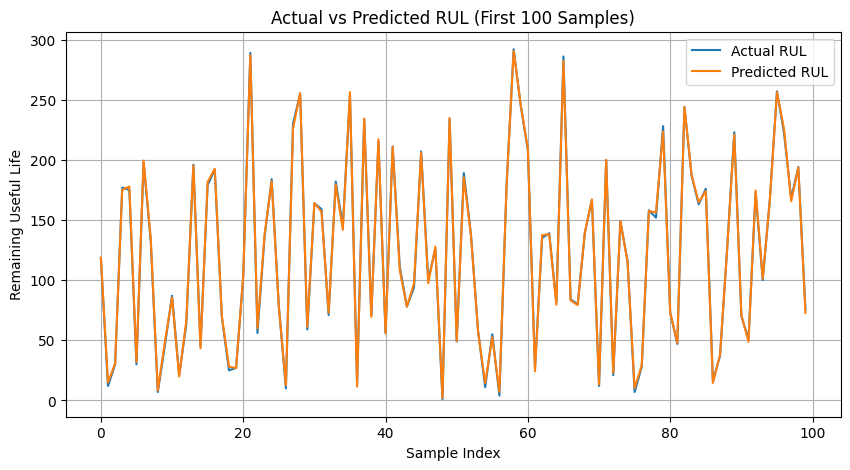

In [2]:
# 📦 Step 1: Install Required Libraries (if not already)
# You can uncomment the below lines if needed
# !pip install pandas scikit-learn matplotlib

# 📂 Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# 📁 Step 3: Load the Dataset
file_path = '/content/Final_Predictive_Maintenance_Dataset_with_Sector.csv'  # Upload this file in Colab
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")
print(df.head())

# 🧹 Step 4: One-Hot Encode the 'sector' Column
# Changed 'sparse=False' to 'sparse_output=False' for compatibility with newer scikit-learn versions
encoder = OneHotEncoder(sparse_output=False)
sector_encoded = encoder.fit_transform(df[['sector']])
sector_encoded_df = pd.DataFrame(sector_encoded, columns=encoder.get_feature_names_out(['sector']))

# 🧮 Step 5: Prepare Features and Target
df_encoded = pd.concat([df.drop(columns=['sector']), sector_encoded_df], axis=1)
X = df_encoded.drop(columns=['RUL'])
y = df_encoded['RUL']

# 🧪 Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Step 7: Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model Trained Successfully!")

# 📊 Step 8: Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📈 Mean Absolute Error: {mae:.2f}")
print(f"📉 Root Mean Squared Error: {rmse:.2f}")
print(f"📊 R^2 Score: {r2:.4f}")

# 📉 Step 9: Plot Actual vs Predicted RUL
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual RUL')
plt.plot(y_pred[:100], label='Predicted RUL')
plt.title('Actual vs Predicted RUL (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# 📦 Install joblib if not already available
# !pip install joblib

import joblib

# 💾 Save the trained model
model_filename = "random_forest_predictive_maintenance_model.pkl"
joblib.dump(model, model_filename)

print(f"✅ Model saved as: {model_filename}")


✅ Model saved as: random_forest_predictive_maintenance_model.pkl
